<font size = 8 color ='336EFF'>k Nearest Neighbors</font>

Import libraries

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Define kNN using the steps from the pseudocode
The KNN Algorithm:
<ol>
    <li>Load the data</li>
    <li>Initialize K to your chosen number of neighbors</li>
    <li>For each example in the data</li>
    <ol>
    <li>Calculate the distance between the query example and the current example from the data.</li>
    <li>Add the distance and the index of the example to an ordered collection</li>
    </ol>
    <li>Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances</li>
    <li>Pick the first K entries from the sorted collection</li>
    <li>Get the labels of the selected K entries</li>
    <li>a) If regression, return the mean of the K labels</li>
    <li>b) If classification, return the mode of the K labels</li>
</ol>

In [3]:
def knn(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []
    # 3. For each example in the data
    neighbor_distances_and_indices = np.zeros((data.shape[0], 2))
    for index, example in enumerate(data):
        # 3.1 Calculate the distance between the query example and the current
        # example from the data.
        distance = distance_fn(example[:-1], query)
        # 3.2 Add the distance and the index of the example to an ordered collection
        neighbor_distances_and_indices[index, 0], neighbor_distances_and_indices[index, 1] = distance, index
        # 4. Sort the ordered collection of distances and indices from
    # smallest to largest (in ascending order) by the distances
    sorted_neighbor_distances_and_indices =  neighbor_distances_and_indices[neighbor_distances_and_indices[:,0].argsort(kind='mergesort')]
    # 5. Pick the first K entries from the sorted collection
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k, :]
    # 6. Get the labels of the selected K entries
    k_nearest_labels = np.zeros((k, 1))
    n = 0
    for distance, i in k_nearest_distances_and_indices:
        i = int(i)
        k_nearest_labels[n, 0] = data[i, -1]
        n += 1

    # 7. If regression (choice_fn = mean), return the average of the K labels
    # 8. If classification (choice_fn = mode), return the mode of the K labels
    return k_nearest_distances_and_indices , choice_fn(k_nearest_labels)

### Auxiliar functions

In [4]:
def mean(labels):
    return sum(labels) / len(labels)

def mode(labels):
    # find unique values in array along with their counts
    vals, counts = np.unique(labels, return_counts=True)
    # find mode
    mode_value = np.argwhere(counts == np.max(counts))
    return mode_value #stats.mode(labels)

def euclidean_distance(point1, point2):
    sum_squared_distance = 0
    dis = np.linalg.norm(point1 - point2)
    return dis

Ploting Functions

In [5]:
def plot_reg(X, y, x_pred, y_pred):
    # plotting points with diff color for diff label
    plt.plot(X, y, 'o', c='b')

    plt.plot(x_pred, y_pred, '*', c='k', label='reg line')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def plot_class(X, y, x_pred, y_pred):
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]
    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 0]], [x_0[:, 1]], c='b', label='y = 0')
    plt.scatter([x_1[:, 0]], [x_1[:, 1]], c='r', label='y = 1')

    # plotting decision boundary
    if y_pred == 0:
        color = 'b'
    elif y_pred == 1:
        color = 'r'
    plt.plot(x_pred[0], x_pred[1], '*', c=color, label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()


### Regression
#### Regression Data
#### Column 0: height (inches)
#### Column 1: weight (pounds)

[128.24666667]


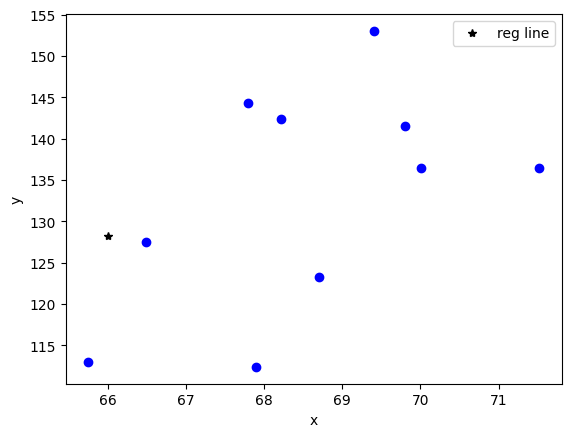

In [6]:
reg_data = np.array([ [65.75, 112.99], [71.52, 136.49], [69.40, 153.03], [68.22, 142.34], [67.79, 144.30], [68.70, 123.30], [69.80, 141.49], [70.01, 136.46], [67.90, 112.37], [66.49, 127.45], ])

# Question:
# Given the data we have, what's the best-guess at someone's weight if they are 60 inches tall?
reg_query = [66]
reg_k_nearest_neighbors, reg_prediction = knn(
    reg_data, reg_query, k=3, distance_fn=euclidean_distance, choice_fn=mean)
print(reg_prediction)
plot_reg(reg_data[:, 0], reg_data[:, 1], reg_query, reg_prediction)


### Classification
#### Classification Data
#### -> Column 0: age
#### -> Column 1: likes pineapple

In [7]:
clf_data = np.array([ [22, 1], [23, 1], [21, 1], [18, 1], [19, 1], [25, 0], [27, 0], [29, 0], [31, 0], [45, 0]])
# Question:
# Given the data we have, does a 33 year old like pineapples on their pizza?
clf_query = [33]
clf_k_nearest_neighbors, clf_prediction = knn(
    clf_data, clf_query, k=3, distance_fn=euclidean_distance, choice_fn=mode)
print(clf_prediction)

[[0]]


### Classification Data
### -> Column 0: height
### -> Column 1: weight
### -> Column 2: 0->Medium, 1->Large

[[1]]


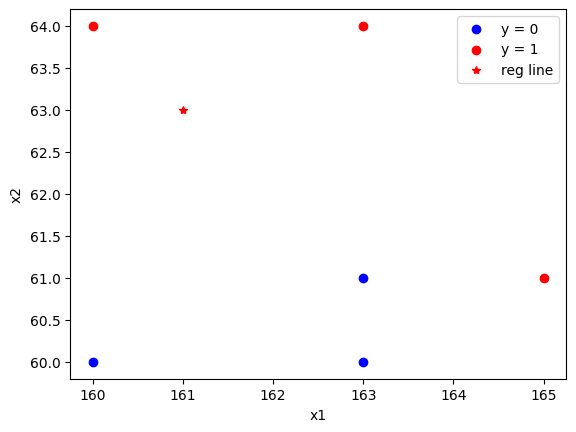

In [9]:
clf_data = np.array([[160, 60, 0], [163, 60, 0], [163, 61, 0], [160, 64, 1], [163, 64, 1], [165, 61, 1]])
# Question:
# Given the data we have, the height of a person is 161cm & it's weight is 63kg, is it a medium [0] or a large[1]?
clf_query = np.array([161, 63])
clf_k_nearest_neighbors, clf_prediction = knn(clf_data,
                                              clf_query,
                                              k=3,
                                              distance_fn=euclidean_distance,
                                              choice_fn=mode)
print(clf_prediction)
plot_class(clf_data[:, :-1], clf_data[:, -1], clf_query, clf_prediction)

## Dataset movies recomendation

### Connect Drive

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
!pwd

Mounted at /content/gdrive
/content


In [ ]:
# put your own path in google drive
%cd "/content/gdrive/MyDrive/Colab Notebooks/AI/MachineLearning/Files"
!ls

/content/gdrive/MyDrive/Colab Notebooks/AI/MachineLearning/Files
cars.csv	 employees.csv	     marathon-data.csv		     wine.data
data.npz	 example.txt	     mkb_data.npz		     wine.names
dataset1.csv	 iris.data	     model.png
dataset1.gsheet  iris.names	     movies_recommendation_data.csv
diabetes.csv	 Mall_Customers.csv  twitterLogo.png


In [ ]:
def recommend_movies(movie_query, k_recommendations):
    raw_movies_data = []
    with open('movies_recommendation_data.csv', 'r') as md:
        # Discard the first line (headings)
    	next(md)

    	# Read the data into memory
    	for line in md.readlines():
        	data_row = line.strip().split(',')
        	raw_movies_data.append(data_row)

	# Prepare the data for use in the knn algorithm by picking
	# the relevant columns and converting the numeric columns
	# to numbers since they were read in as strings
    movies_recommendation_data = []
    for row in raw_movies_data:
        data_row = list(map(float, row[2:]))
        movies_recommendation_data.append(data_row)
    # Use the KNN algorithm to get the 5 movies that are most
	# similar to The Post.
    movies_recommendation_data = np.array(movies_recommendation_data)
    movie_query = np.array(movie_query)
    recommendation_indices, _ = knn(movies_recommendation_data, 
                                    movie_query, 
                                    k=k_recommendations,
                                    distance_fn=euclidean_distance,
                                    choice_fn=lambda x: None)

    movie_recommendations = []
    for _, index in recommendation_indices:
        index = int(index)
        movie_recommendations.append(raw_movies_data[index])

    return movie_recommendations

In [ ]:
the_post = [7.2, 1, 1, 0, 0, 0, 0, 1] # feature vector for The Post
label = 0
recommended_movies = recommend_movies(movie_query=the_post, k_recommendations=5)

# Print recommended movie titles
for recommendation in recommended_movies:
    print(recommendation[1])

12 Years a Slave
Hacksaw Ridge
Queen of Katwe
The Wind Rises
A Beautiful Mind


## Dataset *Music* Recomendation [Homework] Equipo 4

In [53]:
import pandas as pd
df = pd.read_csv('music.csv')

In [64]:
# Keep only numerical columns
music_num = df.select_dtypes(include=[np.number])

# Drop 'Unnamed' column
music_num.drop('Unnamed: 0', axis=1, inplace=True)

# Get an string list of columns
columns_ = music_num.columns.tolist()
final_string = ''.join([f'<li>\'{item}\'</li>' for item in columns_])
final_string

"<li>'release_date'</li><li>'len'</li><li>'dating'</li><li>'violence'</li><li>'world/life'</li><li>'night/time'</li><li>'shake the audience'</li><li>'family/gospel'</li><li>'romantic'</li><li>'communication'</li><li>'obscene'</li><li>'music'</li><li>'movement/places'</li><li>'light/visual perceptions'</li><li>'family/spiritual'</li><li>'like/girls'</li><li>'sadness'</li><li>'feelings'</li><li>'danceability'</li><li>'loudness'</li><li>'acousticness'</li><li>'instrumentalness'</li><li>'valence'</li><li>'energy'</li><li>'age'</li>"

*From a musical database with the following features:*
<ul>
<li>'release_date'</li><li>'len'</li><li>'dating'</li><li>'violence'</li><li>'world/life'</li><li>'night/time'</li><li>'shake the audience'</li><li>'family/gospel'</li><li>'romantic'</li><li>'communication'</li><li>'obscene'</li><li>'music'</li><li>'movement/places'</li><li>'light/visual perceptions'</li><li>'family/spiritual'</li><li>'like/girls'</li><li>'sadness'</li><li>'feelings'</li><li>'danceability'</li><li>'loudness'</li><li>'acousticness'</li><li>'instrumentalness'</li><li>'valence'</li><li>'energy'</li><li>'age'</li>
</ul>

In [65]:
# Showing the dataset
music_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   release_date              28372 non-null  int64  
 1   len                       28372 non-null  int64  
 2   dating                    28372 non-null  float64
 3   violence                  28372 non-null  float64
 4   world/life                28372 non-null  float64
 5   night/time                28372 non-null  float64
 6   shake the audience        28372 non-null  float64
 7   family/gospel             28372 non-null  float64
 8   romantic                  28372 non-null  float64
 9   communication             28372 non-null  float64
 10  obscene                   28372 non-null  float64
 11  music                     28372 non-null  float64
 12  movement/places           28372 non-null  float64
 13  light/visual perceptions  28372 non-null  float64
 14  family

In [67]:
# Showing the dataset
music_num.head()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.0
1,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.0
2,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.0
3,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.0
4,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.0


### Regression: Regression Data
- Column 0: *Sadness*
- Column 1: *Energy*
- Column 2: *Feelings*
- To predict: Column 3: *Danceability*

In [71]:
# Selecting the relevant columns: [Sadness, Energy, Feelings, Danceability]
selected_columns = ['sadness', 'energy', 'feelings', 'danceability']
new_df = df[selected_columns]

print(new_df)

        sadness    energy  feelings  danceability
0      0.380299  0.137110  0.117175      0.357739
1      0.001284  0.263240  0.001284      0.331745
2      0.002770  0.139112  0.225422      0.456298
3      0.225889  0.743736  0.001548      0.686992
4      0.068800  0.394375  0.001350      0.291671
...         ...       ...       ...           ...
28367  0.065664  0.695686  0.001350      0.889527
28368  0.001284  0.797791  0.001284      0.662082
28369  0.001504  0.767761  0.001504      0.663165
28370  0.001196  0.885882  0.001196      0.883028
28371  0.001012  0.492477  0.033995      0.828875

[28372 rows x 4 columns]


In [73]:
# Predict for: 
# Sadness: 0.380299  
# Energy: 0.137110
# Feelings: 0.117175
query_data = [380299, 0.137110, 0.117175]

def knn_predict_danceability(data, query, k, distance_fn, choice_fn):
    neighbor_distances_and_indices = []

    for index, example in enumerate(data):
        distance = distance_fn(example[:-1], query)
        neighbor_distances_and_indices.append((distance, index))

    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices, key=lambda x: x[0])
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k]

    k_nearest_labels = np.zeros((k, 1))
    for n, (distance, i) in enumerate(k_nearest_distances_and_indices):
        i = int(i)
        k_nearest_labels[n, 0] = data[i, -1]

    predicted_danceability = choice_fn(k_nearest_labels)

    return predicted_danceability

# Example usage
# Assuming you have new_df as your DataFrame and query_data as your query example
# You need to provide your own distance_fn and choice_fn functions

predicted_danceability = knn_predict_danceability(
    data=new_df.to_numpy(),
    query=query_data,
    k=3,
    distance_fn=euclidean_distance,
    choice_fn=mean)
print("Predicted Danceability:", predicted_danceability)


Predicted Danceability: [0.59962454]
